# Tinanic Survival

* Dataset has been obtained from kaggle.com

## Data Analysis

In [1]:
import numpy as np
import pandas as pd

#load the files
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

#print some of them
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#print some of them
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#show the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#show the distributions
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#show categorical
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
#showing survival percentiles
train['Survived'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0    0.0
0.1    0.0
0.2    0.0
0.3    0.0
0.4    0.0
0.5    0.0
0.6    0.0
0.7    1.0
0.8    1.0
0.9    1.0
1.0    1.0
Name: Survived, dtype: float64

In [7]:
#showing fare percentiles
train['Fare'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      0.0000
0.1      7.5500
0.2      7.8542
0.3      8.0500
0.4     10.5000
0.5     14.4542
0.6     21.6792
0.7     27.0000
0.8     39.6875
0.9     77.9583
1.0    512.3292
Name: Fare, dtype: float64

## Normalizing and selecting useful data

In [8]:
#Dropping useless features
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
#New column to know if the passenger has family on board
train['Alone'] = (train['SibSp']+train['Parch'] > 0).apply(lambda x: 'yes' if x == 1 else 'no')
train = train.drop(['SibSp', 'Parch'], axis=1)
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,yes
1,1,1,female,38.0,71.2833,C,yes
2,1,3,female,26.0,7.9250,S,no
3,1,1,female,35.0,53.1000,S,yes
4,0,3,male,35.0,8.0500,S,no
5,0,3,male,NaN,8.4583,Q,no
6,0,1,male,54.0,51.8625,S,no
7,0,3,male,2.0,21.0750,S,yes
8,1,3,female,27.0,11.1333,S,yes
9,1,2,female,14.0,30.0708,C,yes


In [10]:
#Transform categorical to dummies
train = pd.get_dummies(train)

#Replace the NaN value with the mean
train = train.fillna(train.mean())
test = test.fillna(test.mean())

train.describe()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Alone_no,Alone_yes
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783,0.602694,0.397306
std,0.486592,0.836071,13.002015,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876,0.489615,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


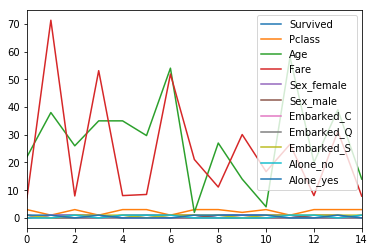

In [11]:
import matplotlib.pyplot as plt

train.head(15).plot()
plt.show()

Train shape: (891, 11)


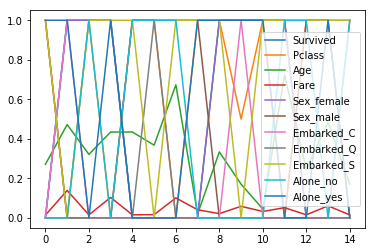

In [12]:
#Squeeze the data to [0,1]
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
train_norm = scaler.fit_transform(train)
column_names = list(train)

print("Train shape: {}".format(train_norm.shape))

plt.figure()
plt.plot(np.arange(15), train_norm[:15])
plt.legend(column_names);
plt.show()

## Neural Network (model)

In [13]:
y_train = np.array(train['Survived'])
X_train = np.array(train.drop('Survived', axis=1))

print(y_train[0:1])
print(X_train[0:1].tolist())

[0]
[[3.0, 22.0, 7.25, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)
y_val = np.reshape(y_val, [-1,1])
y_train = np.reshape(y_train, [-1,1])

print("Shape X train: {}".format(X_train.shape))
print("Shape y train: {}".format(y_train.shape))
print("Shape X validation: {}".format(X_val.shape))
print("Shape y validation: {}".format(y_val.shape))

Shape X train: (623, 10)
Shape y train: (623, 1)
Shape X validation: (268, 10)
Shape y validation: (268, 1)


### Tensorflow

In [15]:
import tensorflow as tf

inputs_len = X_train.shape[1]
outputs_len = y_train.shape[1]

inputs = tf.placeholder(tf.float32, [None, inputs_len])
outputs = tf.placeholder(tf.float32, [None, outputs_len])

weights_init = tf.truncated_normal_initializer(stddev=1/np.sqrt(inputs_len), seed=42)
bias_init = tf.truncated_normal_initializer(stddev=1/np.sqrt(outputs_len), seed=42)

logits = tf.layers.dense(inputs,
                         outputs_len, 
                         activation=tf.nn.sigmoid, 
                         kernel_initializer=weights_init,
                         bias_initializer=bias_init)

cost = tf.reduce_mean(tf.square(outputs - logits))
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

##
epochs = 200
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        _, loss = sess.run([optimizer, cost], feed_dict={inputs: X_train, outputs: y_train})
        
        if epoch % 100 == 0:
            print("Epoch({:2}) Training Loss: {:.5f}".format(epoch, loss))   
        
    acc = sess.run(1-cost, feed_dict={inputs: X_val, outputs: y_val})    
    print("Training accuracy: {:.5f}  Validation Accuracy: {:.5f}".format(1-loss, acc))
    


Epoch( 0) Training Loss: 0.36504
Epoch(100) Training Loss: 0.15136
Training accuracy: 0.85629  Validation Accuracy: 0.84210


### Scikit-learn

In [22]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic',
                    solver='lbfgs',
                    learning_rate_init=1e-3, 
                    learning_rate='adaptive',
                    shuffle=True,
                    #batch_size=100,
                    max_iter=5000,
                    tol=1e-5,
                    hidden_layer_sizes=(8),
                    #warm_start=True,
                    random_state=42,
                    verbose=True)

clf.fit(X_train, y_train.reshape(-1))


#Scores
print("Training score: {}".format(clf.score(X_train, y_train)))
print("Validation score: {}".format(clf.score(X_val, y_val)))

Training score: 0.8378812199036918
Validation score: 0.8022388059701493


### Metrics (scikit-learn)

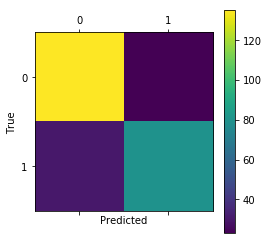

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = clf.predict(X_val)
cm = confusion_matrix(y_val, predictions)

plt.matshow(cm)
plt.colorbar()
ax = plt.gca()
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

plt.show()

In [24]:
print(classification_report(y_val, predictions))

             precision    recall  f1-score   support

          0       0.82      0.85      0.84       158
          1       0.78      0.73      0.75       110

avg / total       0.80      0.80      0.80       268

